
🔍 결측치 확인:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

🔍 레이블 분포 (변환 전):
Survived
0    549
1    342
Name: count, dtype: int64

🔍 레이블 분포 (변환 후):
label
0    549
1    342
Name: count, dtype: int64

🏆 Random Forest:
Accuracy: 0.7709


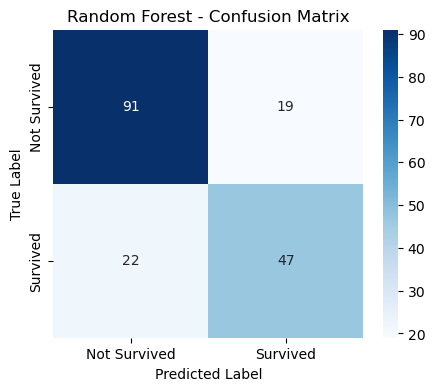


🏆 Decision Tree:
Accuracy: 0.6760


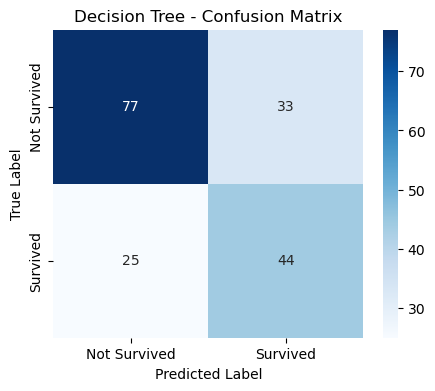


🏆 Logistic Regression:
Accuracy: 0.8101


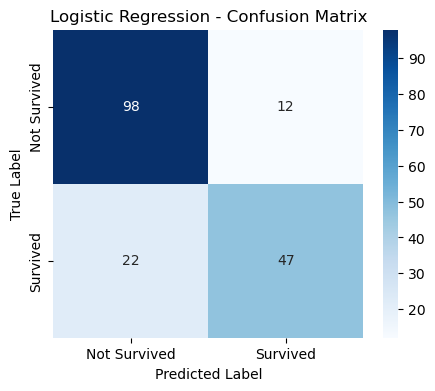


🏆 K-Nearest Neighbors:
Accuracy: 0.6145


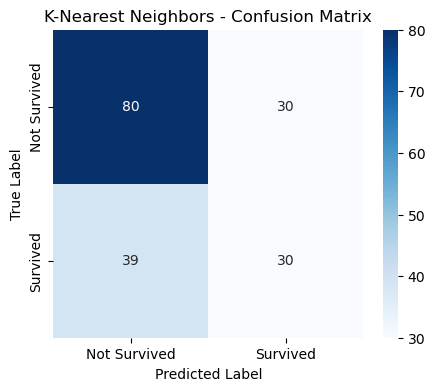


🏆 Support Vector Machine:
Accuracy: 0.6369


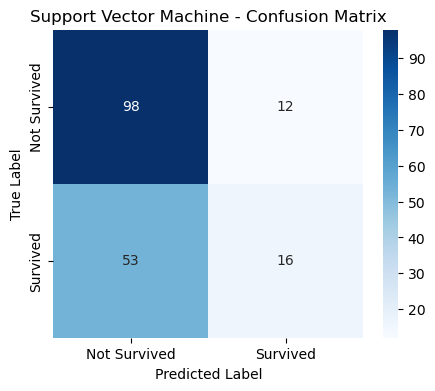

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

# 1️⃣ 데이터 로딩
df = pd.read_csv('C:/Users/dudnj/Gachon/4-2/AI/Week_02/database/titanic.csv')

# 2️⃣ 결측치 확인
print("\n🔍 결측치 확인:")
print(df.isnull().sum())

# 3️⃣ 결측치 처리 (Age -> 평균값, Cabin -> 'Unknown', Embarked -> 최빈값)
df['Age'] = df['Age'].fillna(df['Age'].mean())  
df['Cabin'] = df['Cabin'].fillna('Unknown')  
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])  

# 4️⃣ 레이블 확인 (imbalanced data 확인)
print("\n🔍 레이블 분포 (변환 전):")
print(df['Survived'].value_counts())

# 5️⃣ 불필요한 컬럼 제거 (Name, Ticket 제거)
drop_cols = ['Name', 'Ticket']  
df.drop(columns=drop_cols, inplace=True)

# 6️⃣ 엔코딩 (범주형 데이터를 숫자로 변환)
df.rename(columns={'Survived': 'label'}, inplace=True)  # 레이블 컬럼명 변경
categorical_cols = df.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

print("\n🔍 레이블 분포 (변환 후):")
print(df['label'].value_counts())  # 변환 후 확인

# 데이터 분할
X = df.drop(columns=['label'])
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 5가지 분류 모델 정의
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Logistic Regression": LogisticRegression(solver='liblinear'),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC()
}

# 모델 학습 및 평가
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    
    print(f"\n🏆 {name}:")
    print(f"Accuracy: {acc:.4f}")
    
    # Confusion Matrix 시각화
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Survived", "Survived"], yticklabels=["Not Survived", "Survived"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"{name} - Confusion Matrix")
    plt.show()
